In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy import integrate
from car_park_functions import *
import math

In [2]:
available_parkings = ['Vilanova', 'SantSadurni', 'SantBoi', 'QuatreCamins',
                      'Cerdanyola','Granollers','Martorell','Mollet',
                      'SantQuirze','PratDelLlobregat']
df_column_name=['Parking Vilanova Renfe','Parking Sant Sadurní Renfe','Parking Sant Boi de Llobregat',
              'Parking Quatre Camins','Cerdanyola Universitat Renfe','Parking Granollers Renfe',
                'Parking Martorell FGC','Parking Mollet Renfe','Parking Sant Quirze FGC',
               'Parking Prat del Ll.']
current_parking_ix=0
# problems on Weekend with 2 SantBoi, 4 Cerdanyola, 
# bad data: 6 Martorell, 8 SantQuirze DO NOT USE
#good 0 Vilanova, 1 SantSadurni, 4 QuatreCamins, 5 Granollers, 7 Mollet, 9 PratDelLlobregat 
current_parking = available_parkings[current_parking_ix]
current_column_name=df_column_name[current_parking_ix]


# loadind data:
    # Getting back the objects:
with open('data/'+current_parking+'_normalized.pkl','rb') as f:  # Python 3: open(..., 'rb')
    df_normalized, weekday_offset, friday_offset,  weekend_offset, max_value= pickle.load(f)
    f.close()
axis_ylim = max_value+20

df_training, df_testing = split_data(df_normalized, 3)



df_mean_areas = df_training.groupby(['Profile_3'], as_index=False).mean() 
df_mean_areas[['Profile_3', 'Area']]

friday_area = df_mean_areas.iloc[0]['Area']
weekday_area = df_mean_areas.iloc[1]['Area']
weekend_area = df_mean_areas.iloc[2]['Area']

friday_max = df_mean_areas.iloc[0]['MaxV']
weekday_max = df_mean_areas.iloc[1]['MaxV']
weekend_max = df_mean_areas.iloc[2]['MaxV']

print('Weekday area: ' , weekday_area)
print('Friday area: ' , friday_area)
print('Weekend area: ' , weekend_area)

print('Weekday maximum: ' , weekday_max)
print('Friday maximum: ' , friday_max)
print('Weekend maximum: ' , weekend_max)

Weekday area:  4961.598765432074
Friday area:  4076.986111111094
Weekend area:  862.1666666666708
Weekday maximum:  217.03703703703704
Friday maximum:  187.5
Weekend maximum:  36.92857142857143


## MATHEMATICAL MODEL - CDF Subtraction

In [3]:
# ********************************************** WEEKDAY *************************************************************
#from scipy.special import tna, factorial
from scipy.optimize import minimize
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
time = np.linspace(0,23.5,48)
time_tn=time/24


#training_weekdays_norm  = get_days_of_protos_normalized("Weekday", df_training)
#training_fridays_norm  = get_days_of_protos_normalized("Friday", df_training)
#training_weekends_norm  = get_days_of_protos_normalized("Weekend", df_training)
training_weekdays_norm  = get_days_of_protos_areanormalized("Weekday", df_training)
training_fridays_norm  = get_days_of_protos_areanormalized("Friday", df_training)
training_weekends_norm  = get_days_of_protos_areanormalized("Weekend", df_training)

training_weekends_norm = training_weekends_norm[:-1]

training_weekdays_isfull  = get_parkingfull_of_protos("Weekday", df_training)
training_weekdays_date  =  get_dates_of_protos("Weekday", df_training)
training_fridays_isfull  = get_parkingfull_of_protos("Friday", df_training)
training_fridays_date  =  get_dates_of_protos("Friday", df_training)
training_weekends_date  =  get_dates_of_protos("Weekday", df_training)

# training_weekends_norm = t
wd_length = len(training_weekdays_norm)
f_length = len(training_fridays_norm)
we_length = len(training_weekends_norm)

parameters_tn = np.array([.2 ,.05,.7,.1])
#optimal_params_weekdaytn = minimize(model_tn_areaN, parameters_tn, args=(training_weekdays_norm), method='Nelder-Mead',
#                                    tol=1e-6, options={'disp': True})

errors = np.ones(np.shape(training_weekdays_norm))
optimal_params_weekdaytn = minimize(model_tn_areaN_args,
                                    parameters_tn, 
                                    args=(training_weekdays_norm, errors),
                                    method='Nelder-Mead',
                                    tol=1e-6, options={'disp': True, 'maxfev': 10000})



Optimization terminated successfully.
         Current function value: 0.003851
         Iterations: 161
         Function evaluations: 275


In [4]:
import math 
var_weekdaytn_time = np.mean(errors)
stdv_weekdaytn=math.sqrt(var_weekdaytn_time)
print('global stdv %.5f\n' % stdv_weekdaytn)
stdv_weekday30mins = np.sqrt(np.mean(errors,0))
print('stdv per time-step')
for i in stdv_weekday30mins:
    print('\t' + str(i))

global stdv 0.00172

stdv per time-step
	0.0013097585185912603
	0.0010100559444837945
	0.0006327428943955147
	0.0005782533476483893
	0.0005570705182131049
	0.0005495127606088221
	0.0005407650228053193
	0.0005186979546770341
	0.0005752253830207369
	0.001875360371881469
	0.001310885075380783
	0.001418128365319191
	0.0028324903067805268
	0.003274593725480398
	0.002035372281081024
	0.0014181728190787765
	0.0013734827766216774
	0.0013282312336090894
	0.001704244341748207
	0.0017370872963440322
	0.001465303340128006
	0.0010840222244742
	0.0011623859800905137
	0.0010751583297614132
	0.0013160243417634717
	0.001498944866608671
	0.0018401788905661844
	0.001867819676529682
	0.0012938027887871284
	0.0010266174869566428
	0.0010069830973666281
	0.0014805804608306664
	0.002051905540390234
	0.0021942589884186505
	0.001314416705561334
	0.0015025713598217233
	0.0019548616434103476
	0.00217227219269217
	0.0018514573784286577
	0.001901073996886158
	0.002442709617834837
	0.002306120947654336
	0.0023677429

In [5]:
optimal_params_weekdaytn

 final_simplex: (array([[0.28858668, 0.05259237, 0.77801314, 0.12862852],
       [0.28858664, 0.05259241, 0.77801298, 0.12862771],
       [0.28858672, 0.05259248, 0.77801267, 0.12862844],
       [0.28858682, 0.05259259, 0.77801305, 0.12862848],
       [0.28858667, 0.05259265, 0.77801295, 0.12862873]]), array([0.00385085, 0.00385085, 0.00385085, 0.00385085, 0.00385085]))
           fun: 0.003850845642572666
       message: 'Optimization terminated successfully.'
          nfev: 275
           nit: 161
        status: 0
       success: True
             x: array([0.28858668, 0.05259237, 0.77801314, 0.12862852])

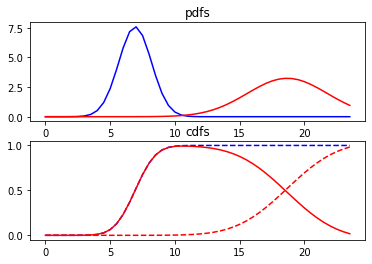

In [6]:
plot_model_tn(optimal_params_weekdaytn.x[0],optimal_params_weekdaytn.x[1],optimal_params_weekdaytn.x[2],optimal_params_weekdaytn.x[3])

In [7]:
weekday_math_params = optimal_params_weekdaytn.x
weekday_math_params

array([0.28858668, 0.05259237, 0.77801314, 0.12862852])

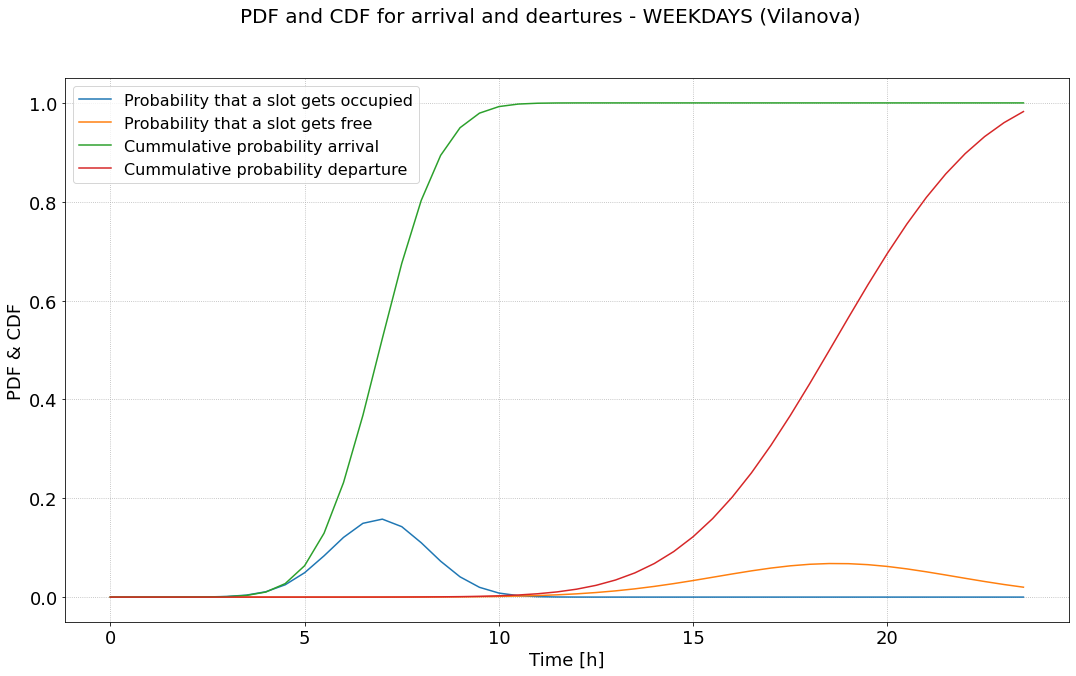

In [8]:
time2 = np.linspace(0,23.5,48)
time_tn=time2/24
tn1_wd=tn(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])
tn2_wd=tn(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])
#tn1_wd = gam(time2, optimal_params_weekday.x[0], optimal_params_weekday.x[1])
#tn2_wd = gam(time2, optimal_params_weekday.x[2], optimal_params_weekday.x[3])

#cdf1_wd_ap = generate_cdf(tn1_wd)
#cdf2_wd_ap = generate_cdf(tn2_wd)
cdf1_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])
cdf2_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])
#cdf1_wd = generate_cdf(tn1_wd)
#cdf2_wd = generate_cdf(tn2_wd)

resta_wd = np.array(cdf1_wd) - np.array(cdf2_wd)
prototype_math_weekday = resta_wd/sum(resta_wd)

#resta_wd_ap= np.array(cdf1_wd_ap) - np.array(cdf2_wd_ap)
#prototype_math_weekday_ap = resta_wd_ap/sum(resta_wd_ap)

fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for arrival and deartures - WEEKDAYS ("+current_parking+")", fontsize=20)
plt.plot(time2, tn1_wd/sum(tn1_wd), label="Probability that a slot gets occupied")
plt.plot(time2, tn2_wd/sum(tn2_wd),  label="Probability that a slot gets free")
plt.plot(time2, cdf1_wd, label="Cummulative probability arrival")
plt.plot(time2, cdf2_wd, label="Cummulative probability departure")
#plt.plot(time2, cdf1_wd_ap, label="Cummulative probability arrival approx")
#plt.plot(time2, cdf2_wd_ap, label="Cummulative probability departure approx")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left");


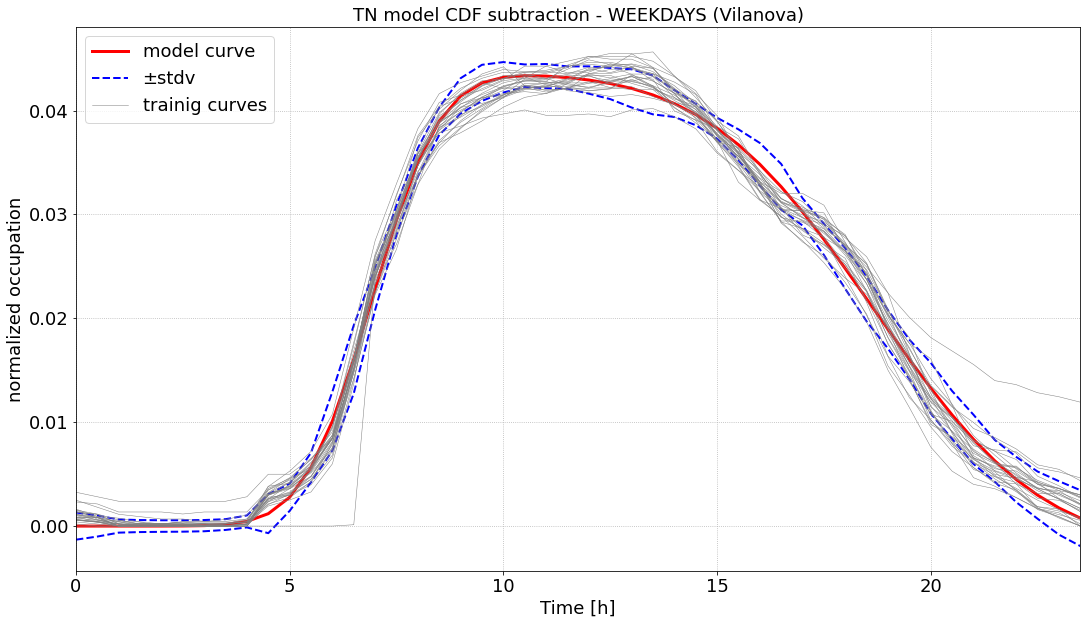

In [9]:
fsize=18
fig = plt.figure(figsize=(18,10))
plt.title("TN model CDF subtraction - WEEKDAYS ("+current_parking+")", fontsize=fsize)
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=fsize)
plt.ylabel("normalized occupation", fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.plot(time2, prototype_math_weekday-stdv_weekday30mins, linewidth=2, linestyle='--', color='blue')
plt.plot(time2, prototype_math_weekday, linewidth=3, color='red', label="model curve")
plt.plot(time2, prototype_math_weekday+stdv_weekday30mins, linewidth=2, linestyle='--', color='blue', label="±stdv")
#plt.plot(time2, prototype_math_weekday_ap, linewidth=3, color='red', label="approx")
for i in range(0,len(training_weekdays_norm)):
    if i==0:
        plt.plot(time, training_weekdays_norm[i], linewidth=0.5, color='gray', label="trainig curves")
    else:
        plt.plot(time, training_weekdays_norm[i], linewidth=0.5, color='gray')

plt.xlim([0,23.5])
plt.legend(fontsize=fsize, loc="upper left");
fig.savefig('Training_'+current_parking+'.pdf',bbox_inches='tight');
fig.savefig('Training_'+current_parking+'.png',bbox_inches='tight');

### FRIDAYS

In [10]:
parameters_tn = np.array([.2 ,.05,.7,.1])
#optimal_params_fridaytn = minimize(model_tn_areaN, parameters_tn, args=(training_fridays_norm), method='Nelder-Mead',
#                                    tol=1e-6, options={'disp': True})

errors = np.ones(np.shape(training_fridays_norm))
optimal_params_fridaytn = minimize(model_tn_areaN_args,
                                    parameters_tn, 
                                    args=(training_fridays_norm, errors),
                                    method='Nelder-Mead',
                                    tol=1e-6, options={'disp': True})


Optimization terminated successfully.
         Current function value: 0.002544
         Iterations: 144
         Function evaluations: 246


In [11]:
var_fridaytn = np.mean(errors)
stdv_fridaytn=math.sqrt(var_fridaytn)
print('global stdv %.5f\n' % stdv_fridaytn)
stdv_friday30mins = np.sqrt(np.mean(errors,0))
print('stdv per time-step')
for i in stdv_friday30mins:
    print('\t' + str(i))

global stdv 0.00297

stdv per time-step
	0.0032717599461226324
	0.0029405280956746006
	0.0026257577738189528
	0.0024239100226483615
	0.0022293292519942375
	0.0022024883924844107
	0.002147495852520089
	0.0020666825653282315
	0.0020631453968660814
	0.0022723947768603257
	0.001974013483454552
	0.002798055982174081
	0.0041594726078989855
	0.0023330315254749285
	0.0021812648511271137
	0.0014043917252027332
	0.0019351463589629366
	0.0019729136257239984
	0.0027446421969176808
	0.0032992264470910436
	0.003407258971272793
	0.0030601678971667735
	0.00329788858834674
	0.00249904186953789
	0.002081064267369432
	0.002311296657588993
	0.002485343274094355
	0.0026353663551066447
	0.0030228789884211267
	0.003364996421479815
	0.0026387412046876427
	0.0011689229874915523
	0.0029417208353270745
	0.004690475834942181
	0.004944582436707814
	0.004516115572305841
	0.004072369130619256
	0.0038336944821927214
	0.0038364666309207017
	0.0034715461619094327
	0.003134549187555222
	0.003135222957588734
	0.003072770

In [12]:
optimal_params_fridaytn

 final_simplex: (array([[0.29337416, 0.06573958, 0.72696181, 0.14788074],
       [0.29337433, 0.06573973, 0.72696146, 0.14788037],
       [0.2933744 , 0.06573937, 0.72696165, 0.14788072],
       [0.29337441, 0.06573955, 0.72696112, 0.14788109],
       [0.29337463, 0.06573957, 0.72696175, 0.14788156]]), array([0.00254407, 0.00254407, 0.00254407, 0.00254407, 0.00254407]))
           fun: 0.00254406806367286
       message: 'Optimization terminated successfully.'
          nfev: 246
           nit: 144
        status: 0
       success: True
             x: array([0.29337416, 0.06573958, 0.72696181, 0.14788074])

In [13]:
#optimal_params_friday.x
#friday_math_params = optimal_params_friday.x
friday_math_params = optimal_params_fridaytn.x

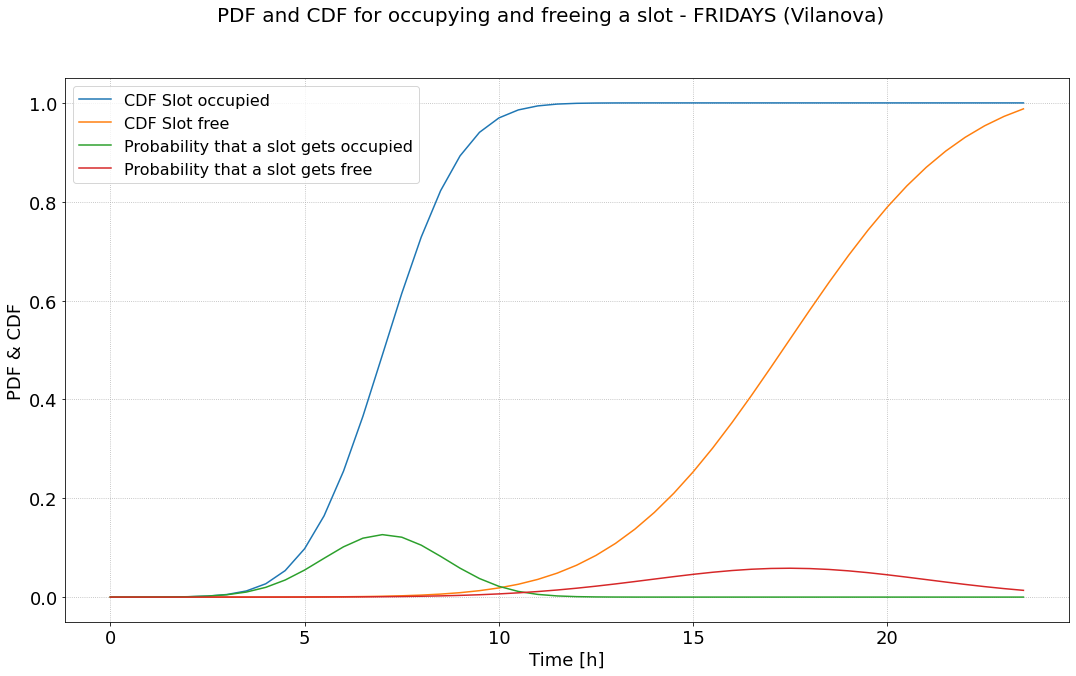

In [14]:

#tn1_fri = gam(time, optimal_params_friday.x[0], optimal_params_friday.x[1])
#tn2_fri = gam(time, optimal_params_friday.x[2], optimal_params_friday.x[3])
tn1_fri=tn(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])
tn2_fri=tn(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])

#cdf1_fri = generate_cdf(tn1_fri)
#cdf2_fri = generate_cdf(tn2_fri)
#cdf1_fri = generate_cdf(tn1_fri)
#cdf2_fri = generate_cdf(tn2_fri)
cdf1_fri=tn_cdf(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])
cdf2_fri=tn_cdf(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])

resta = np.array(cdf1_fri) - np.array(cdf2_fri)
prototype_math_friday = resta/sum(resta)
fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for occupying and freeing a slot - FRIDAYS ("+current_parking+")", fontsize=20)
plt.plot(time, cdf1_fri, label="CDF Slot occupied")
plt.plot(time, cdf2_fri, label="CDF Slot free")
plt.plot(time, tn1_fri/sum(tn1_fri), label="Probability that a slot gets occupied")
plt.plot(time, tn2_fri/sum(tn2_fri),  label="Probability that a slot gets free")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left")

plt.legend(fontsize=16)

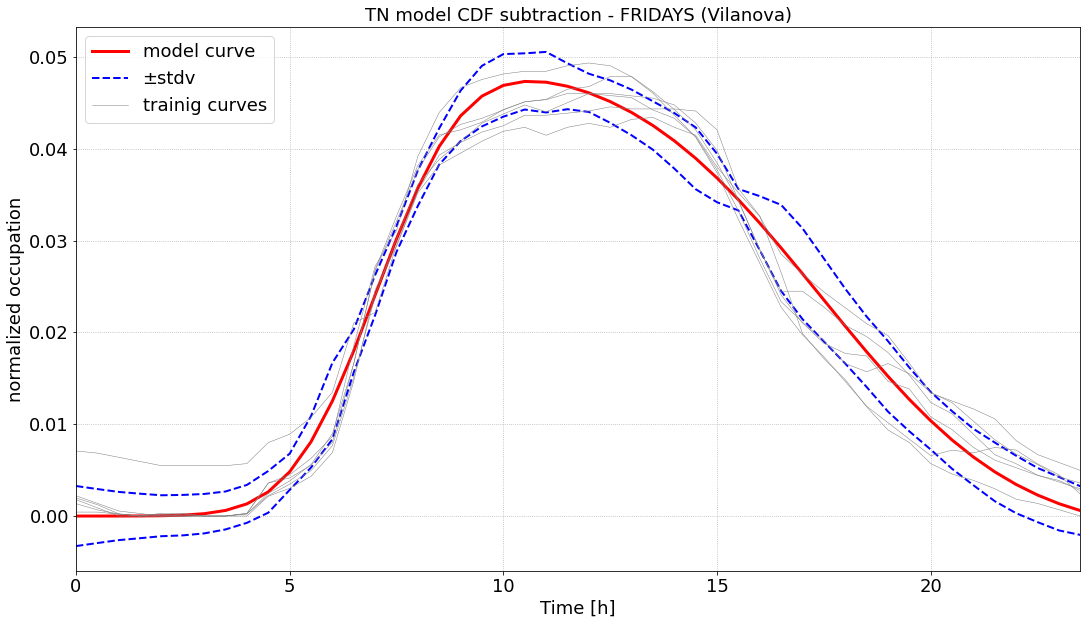

In [15]:
fsize=18
fig = plt.figure(figsize=(18,10))
plt.title("TN model CDF subtraction - FRIDAYS ("+current_parking+")", fontsize=fsize)
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=fsize)
plt.ylabel("normalized occupation", fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.plot(time2, prototype_math_friday-stdv_friday30mins, linewidth=2, linestyle='--', color='blue')
plt.plot(time2, prototype_math_friday, linewidth=3, color='red', label="model curve")
plt.plot(time2, prototype_math_friday+stdv_friday30mins, linewidth=2, linestyle='--', color='blue', label="±stdv")

#plt.plot(time2, prototype_math_weekday_ap, linewidth=3, color='red', label="approx")
for i in range(0,len(training_fridays_norm)):
    if i==0:
        plt.plot(time, training_fridays_norm[i], linewidth=0.5, color='gray', label="trainig curves")
    else:
        plt.plot(time, training_fridays_norm[i], linewidth=0.5, color='gray')

plt.xlim([0,23.5])
plt.legend(fontsize=fsize, loc="upper left");
fig.savefig('Training_'+current_parking+'_FRIDAY.pdf',bbox_inches='tight');

### WEEKENDS

In [16]:
parameters_tn = np.array([.2 ,.05,.7,.1])
errors = np.ones(np.shape(training_weekends_norm))    
if ((current_parking == "SantBoi") or (current_parking == "Cerdanyola")): 
    #optimal_params_weekendtn = minimize(model_tn_areaN_args, parameters_tn, args=(training_weekends_norm), method='SLSQP',
    #                                   bounds=((0, None), (0, None),(0, None),(0, None)),
    #                                    tol=1e-6, options={'disp': True, 'maxfev': 100000})
    optimal_params_weekendtn = minimize(model_tn_areaN_args,
                                    parameters_tn, 
                                    args=(training_weekends_norm, errors),
                                    method='SLSQP',
                                    bounds=((0, None), (0, None),(0, None),(0, None)),
                                    tol=1e-6, options={'disp': True, 'maxfev': 100000})
else:
    #optimal_params_weekendtn = minimize(model_tn_areaN_args, parameters_tn, args=(training_weekends_norm), method='Nelder-Mead',
    #                                    tol=1e-6, options={'disp': True, 'maxfev': 100000})     
    
    optimal_params_weekendtn = minimize(model_tn_areaN_args,
                                    parameters_tn, 
                                    args=(training_weekends_norm, errors),
                                    method='Nelder-Mead',
                                    tol=1e-6, options={'disp': True, 'maxfev': 100000})


Optimization terminated successfully.
         Current function value: 0.022640
         Iterations: 7668
         Function evaluations: 12436


In [17]:
var_weekendtn = np.mean(errors)
stdv_weekendtn=math.sqrt(var_weekendtn)
print('global stdv %.5f\n' % stdv_weekendtn)
stdv_weekend30mins = np.sqrt(np.mean(errors,0))
print('stdv per time-step')
for i in stdv_weekend30mins:
    print('\t' + str(i))

global stdv 0.00602

stdv per time-step
	0.011463533613283363
	0.008041012031169166
	0.004598841327427287
	0.0032983068608684932
	0.0016820209596751761
	0.0014274273440425885
	0.0015667091117511592
	0.0019526520863306482
	0.0031084390263598797
	0.0034768358396470994
	0.004020616169040663
	0.004687349521133961
	0.006378541812055334
	0.00798164611320364
	0.008082249368154422
	0.008003493664159742
	0.007169822054349146
	0.00677467140829328
	0.006690523880299217
	0.007112131882638037
	0.006293766810686958
	0.005036690439872671
	0.006136454932086162
	0.005873619461227098
	0.005505293010746875
	0.005821681057034486
	0.006812864451660624
	0.004850985005436602
	0.0042434158588829755
	0.005228362344256976
	0.00631446587824145
	0.007793284517768517
	0.007452634345357658
	0.006641513222201757
	0.007150035580785266
	0.006963196902294972
	0.006481997546779954
	0.0071183305067725544
	0.00812686463203523
	0.008018813727224882
	0.006618119298361486
	0.00462381677715347
	0.004990650111570825
	0.0045529

In [18]:
weekend_math_params = optimal_params_weekendtn.x
optimal_params_weekendtn.x

array([3.26647331e-01, 1.25292000e-01, 1.03715781e+04, 3.04270639e+01])

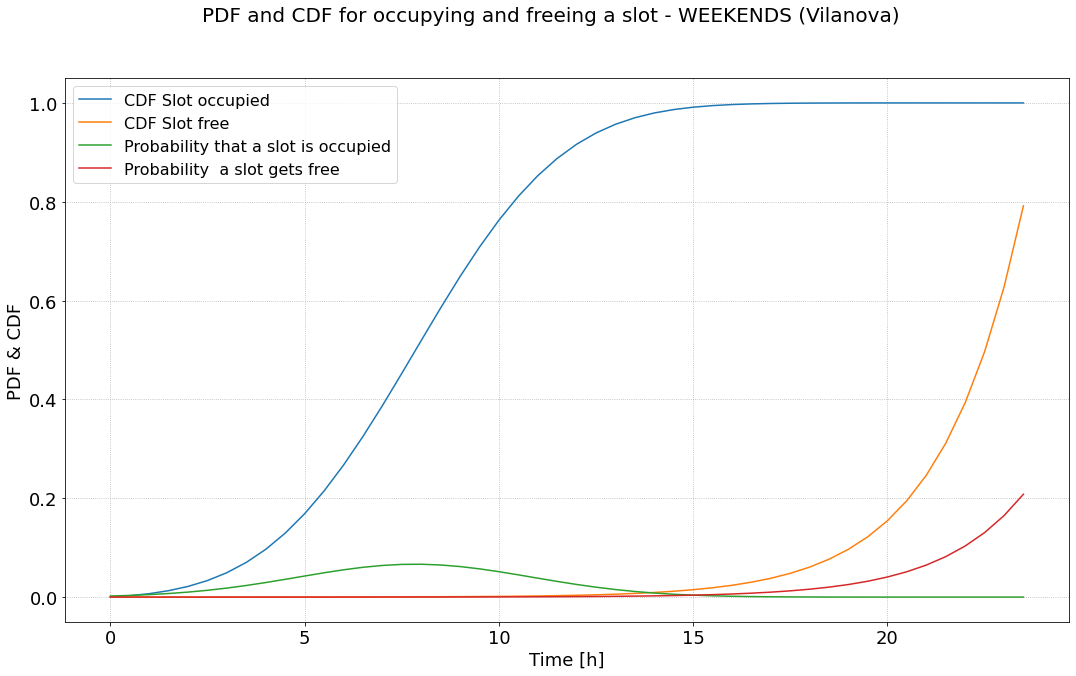

In [19]:
#tn1_we = gam(time, optimal_params_weekend.x[0], optimal_params_weekend.x[1])
#tn2_we = gam(time, optimal_params_weekend.x[2], optimal_params_weekend.x[3])
tn1_we=tn(time_tn, optimal_params_weekendtn.x[0], optimal_params_weekendtn.x[1])
tn2_we=tn(time_tn, optimal_params_weekendtn.x[2], optimal_params_weekendtn.x[3])



#cdf1_we = generate_cdf(tn1_we)
#cdf2_we = generate_cdf(tn2_we)
cdf1_we = tn_cdf(time_tn, optimal_params_weekendtn.x[0], optimal_params_weekendtn.x[1])
cdf2_we = tn_cdf(time_tn, optimal_params_weekendtn.x[2], optimal_params_weekendtn.x[3])



resta_we = np.array(cdf1_we) - np.array(cdf2_we)
prototype_math_weekend = resta_we/sum(resta_we)
fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for occupying and freeing a slot - WEEKENDS ("+current_parking+")", fontsize=20)
plt.plot(time, cdf1_we, label="CDF Slot occupied")
plt.plot(time, cdf2_we, label="CDF Slot free")
plt.plot(time, tn1_we/sum(tn1_we), label="Probability that a slot is occupied")
plt.plot(time, tn2_we/sum(tn2_we),  label="Probability  a slot gets free")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left")

plt.legend(fontsize=16)

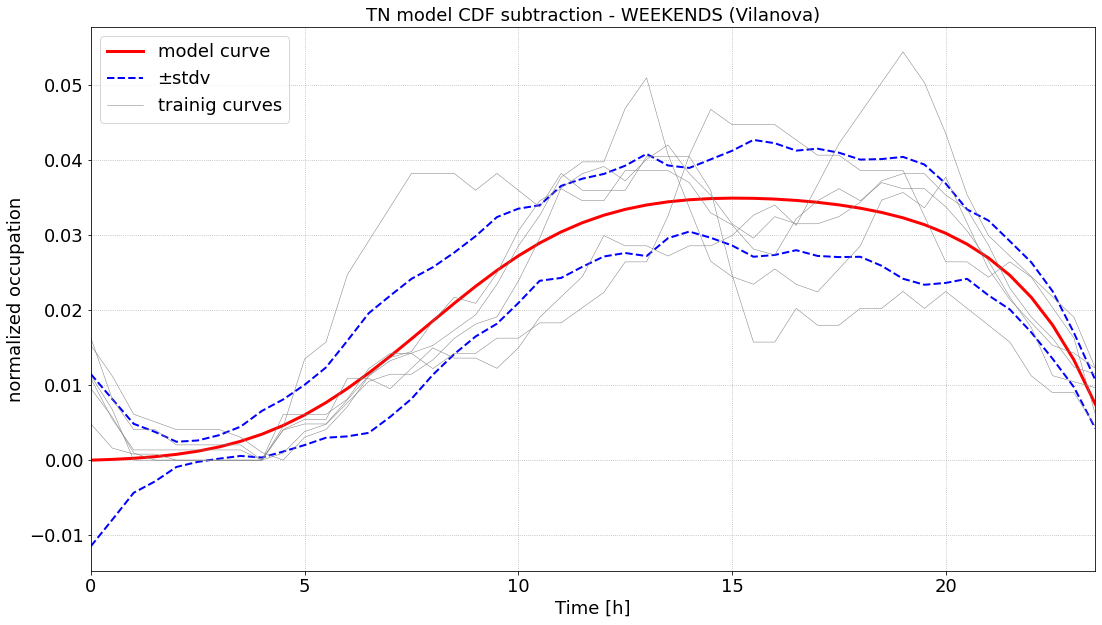

In [20]:
fsize=18
fig = plt.figure(figsize=(18,10))
plt.title("TN model CDF subtraction - WEEKENDS ("+current_parking+")", fontsize=fsize)
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=fsize)
plt.ylabel("normalized occupation", fontsize=fsize)
plt.yticks(fontsize=fsize)
plt.xticks(fontsize=fsize)
plt.plot(time2, prototype_math_weekend-stdv_weekend30mins, linewidth=2, linestyle='--', color='blue')
plt.plot(time2, prototype_math_weekend, linewidth=3, color='red', label="model curve")
plt.plot(time2, prototype_math_weekend+stdv_weekend30mins, linewidth=2, linestyle='--', color='blue', label="±stdv")

for i in range(0,len(training_fridays_norm)):
    if i==0:
        plt.plot(time, training_weekends_norm[i], linewidth=0.5, color='gray', label="trainig curves")
    else:
        plt.plot(time, training_weekends_norm[i], linewidth=0.5, color='gray')

plt.xlim([0,23.5])
plt.legend(fontsize=fsize, loc="upper left");
fig.savefig('Training_'+current_parking+'WEEKEND.pdf',bbox_inches='tight');

In [21]:
printTimes(optimal_params_weekdaytn.x,current_parking,'WEEKDAYS')
printTimes(optimal_params_fridaytn.x,current_parking,'FRIDAYS')
printTimes(optimal_params_weekendtn.x,current_parking,'WEEKENDS')

--------- WEEKDAYS Vilanova -----------
Mean Arrival Time   = 06:55h
stdv Arrival        =  1:15h
Mean Departure Time = 18:40h
stdv Departure      =  3:05h
--------- FRIDAYS Vilanova -----------
Mean Arrival Time   = 07:02h
stdv Arrival        =  1:34h
Mean Departure Time = 17:26h
stdv Departure      =  3:32h
--------- WEEKENDS Vilanova -----------
Mean Arrival Time   = 07:50h
stdv Arrival        =  3:00h
Mean Departure Time = 248917:52h
stdv Departure      = 730:14h


In [22]:
tn_weekday_n = prototype_math_weekday
tn_friday_n = prototype_math_friday
tn1_weekend_n = prototype_math_weekend

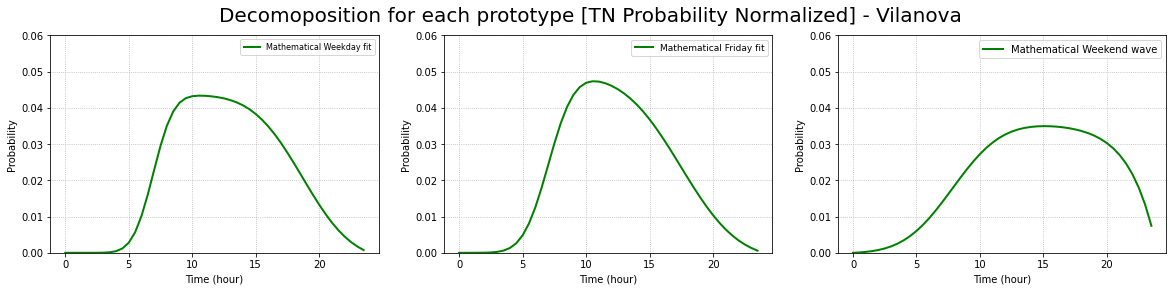

In [23]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
fig.suptitle('Decomoposition for each prototype [TN Probability Normalized] - ' + current_parking, fontsize=20)

# for ii in range(len(training_weekdays_norm)):
#     ax[0].plot(time,training_weekdays_norm[ii], linewidth='0.5')
ax[0].plot(time2, tn_weekday_n, linewidth=2, color= 'green', label='Mathematical Weekday fit')
ax[0].set_ylim([0,0.06])
ax[0].grid(linestyle='dotted')
ax[0].legend(fontsize=8)
ax[0].set_xlabel('Time (hour)')
ax[0].set_ylabel('Probability')

# for ii in range(len(training_fridays_norm)):
#     ax[1].plot(time,training_fridays_norm[ii], linewidth='0.5')
ax[1].plot(time2, tn_friday_n, linewidth=2, color= 'green', label='Mathematical Friday fit')
ax[1].set_ylim([0,0.06])
ax[1].grid(linestyle='dotted')
ax[1].legend(fontsize=9)
ax[1].set_xlabel('Time (hour)')
ax[1].set_ylabel('Probability')

# for ii in range(len(training_weekends_norm)):
#      ax[2].plot(time,training_weekends_norm[ii], linewidth='0.5')
ax[2].plot(time2, tn1_weekend_n, linewidth=2, color='green', label='Mathematical Weekend wave')
ax[2].set_ylim([0,0.06])
ax[2].grid(linestyle='dotted')
ax[2].legend()
ax[2].set_xlabel('Time (hour)')
ax[2].set_ylabel('Probability');

In [24]:
#**************************************WEEKDAY************************************
tn_weekday = tn_weekday_n*weekday_area + weekday_offset

#**************************************FRIDAY************************************
tn_friday = tn_friday_n*friday_area + friday_offset

#**************************************WEEKEND************************************
tn1_weekend = tn1_weekend_n*weekend_area + weekend_offset 

### Comparing normalized mathematical fitted prototype with testing data

### Denormalization / Rescaling

In [25]:

tn_weekday = tn_weekday_n*weekday_area + weekday_offset
tn_friday = tn_friday_n*friday_area + friday_offset
tn1_weekend = tn1_weekend_n*weekend_area + weekend_offset 



In [26]:
with open('data/'+current_parking+'_testing.pkl','rb') as f:  # Python 3: open(..., 'rb')
    [testing_mondays, testing_mondays_dates, testing_tuesdays, testing_tuesdays_dates, 
    testing_wednesdays, testing_wednesdays_dates, testing_thursdays, testing_thursdays_dates, 
    testing_fridays, testing_fridays_dates, testing_saturdays, testing_saturdays_dates,
    testing_sundays, testing_sundays_dates]= pickle.load(f)
    f.close()  
  

______MEAN________
4.976219699641576
3.043072621015494
2.3160598487431017
2.6910438924194025
4.356133082320792
2.932897642588005
4.683807886818376
______STDV________
1.6849321959691865
0.9520513567010729
0.7381182144411502
0.5080729654215765
1.9994999305338683
0.5731623744425415
1.6427273009354386


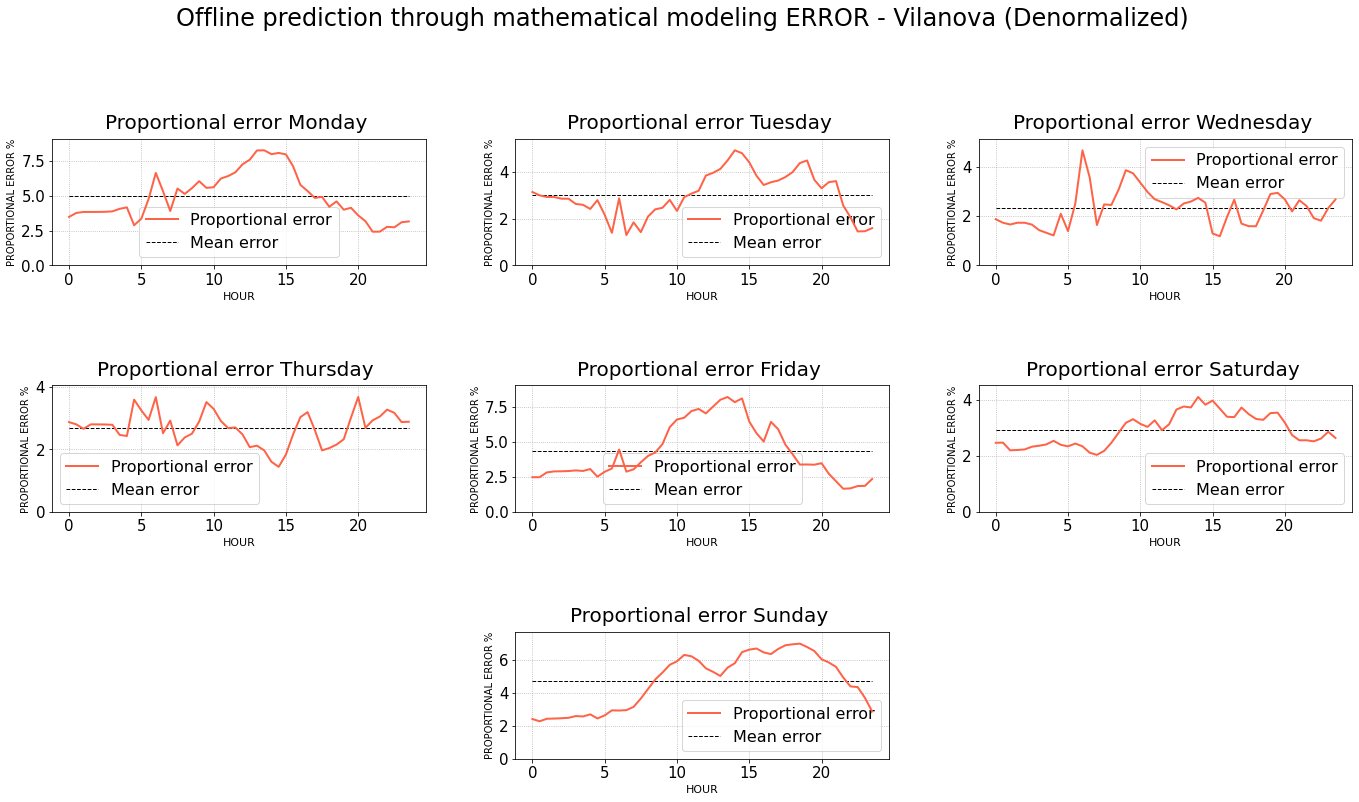

In [27]:


error_monday_tn = compute_testing_prop_errorM(testing_mondays, tn_weekday, max_value)
error_tuesday_tn = compute_testing_prop_errorM(testing_tuesdays, tn_weekday, max_value)
error_wednesday_tn = compute_testing_prop_errorM(testing_wednesdays, tn_weekday, max_value)
error_thursday_tn = compute_testing_prop_errorM(testing_thursdays, tn_weekday, max_value)
error_friday_tn = compute_testing_prop_errorM(testing_fridays, tn_friday, max_value)
error_saturday_tn = compute_testing_prop_errorM(testing_saturdays, tn1_weekend, max_value)
error_sunday_tn = compute_testing_prop_errorM(testing_sundays, tn1_weekend, max_value)



    
fig, ax = plt.subplots(3, 3)
fig.set_figwidth(20)
fig.set_figheight(12)
fig.suptitle('Offline prediction through mathematical modeling ERROR - '+current_parking+' (Denormalized)', fontsize=24)
time = np.linspace(0,23.5,48)

mean_Monday =  [np.mean(error_monday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 0, 0, time, error_monday_tn, mean_Monday, 
                 'Proportional error Monday ', 'Monday')

mean_Tuesday =  [np.mean(error_tuesday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 0, 1, time, error_tuesday_tn, mean_Tuesday, 
                 'Proportional error Tuesday ', 'Tuesday')

mean_Wednesday =  [np.mean(error_wednesday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 0, 2, time, error_wednesday_tn, mean_Wednesday, 
                 'Proportional error Wednesday ', 'Wednesday')

mean_Thursday =  [np.mean(error_thursday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 1, 0, time, error_thursday_tn, mean_Thursday, 
                 'Proportional error Thursday ', 'Thursday')

mean_Friday =  [np.mean(error_friday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 1, 1, time, error_friday_tn, mean_Friday, 
                 'Proportional error Friday ', 'Friday')

mean_Saturday =  [np.mean(error_saturday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 1, 2, time, error_saturday_tn, mean_Saturday, 
                 'Proportional error Saturday ', 'Saturday')

mean_Sunday =  [np.mean(error_sunday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 2, 1, time, error_sunday_tn, mean_Sunday, 
                 'Proportional error Sunday ', 'Sunday')

ax[2,0].set_visible(False)
ax[2,2].set_visible(False)
fig.tight_layout(pad=5.0)
for ax in ax.flat:
    ax.set_ylabel('PROPORTIONAL ERROR %', fontsize=10)
    ax.set_xlabel('HOUR', fontsize=11)


print('______MEAN________')    

print(mean_Monday[0])
print(mean_Tuesday[0])
print(mean_Wednesday[0])
print(mean_Thursday[0])
print(mean_Friday[0])
print(mean_Saturday[0])
print(mean_Sunday[0])

print('______STDV________')

print(np.std(error_monday_tn))
print(np.std(error_tuesday_tn))
print(np.std(error_wednesday_tn))
print(np.std(error_thursday_tn))
print(np.std(error_friday_tn))
print(np.std(error_saturday_tn))
print(np.std(error_sunday_tn))


### MATHEMATICAL PROTOTYE: Real time prediction by SCALING

In [28]:
with open('data/'+current_parking+'_proto.pkl','rb') as f:  # Python 3: open(..., 'rb')
    [hist_weekday_proto, hist_friday_proto, hist_weekend_proto]= pickle.load(f)
    f.close() 

#### MONDAY

2020-02-24
Real Monday scaled prtotype error:  0.94 %
Real Monday scaled prtotype STDV:  0.5457220210614975
Real Monday scaled TN error:  1.78 %
Real Monday scaled TN STDV:  0.7857759958087944
_____________________________________________________________
2020-03-02
Real Monday scaled prtotype error:  8.64 %
Real Monday scaled prtotype STDV:  4.8496020349735
Real Monday scaled TN error:  6.97 %
Real Monday scaled TN STDV:  4.217909782004772
_____________________________________________________________
2020-03-09
Real Monday scaled prtotype error:  5.91 %
Real Monday scaled prtotype STDV:  3.3025912074139128
Real Monday scaled TN error:  4.02 %
Real Monday scaled TN STDV:  2.7451378476235626
_____________________________________________________________


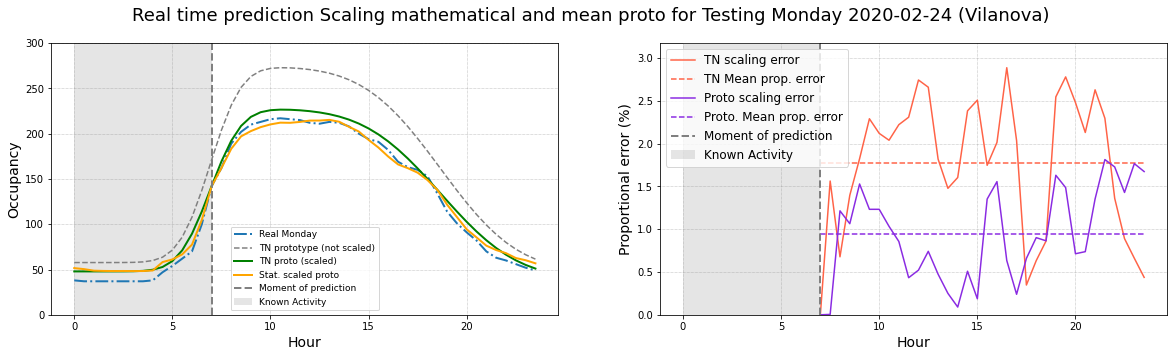

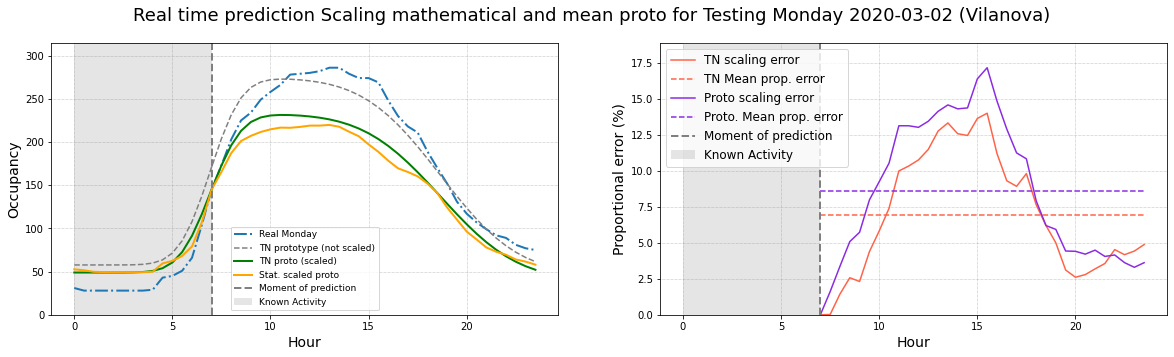

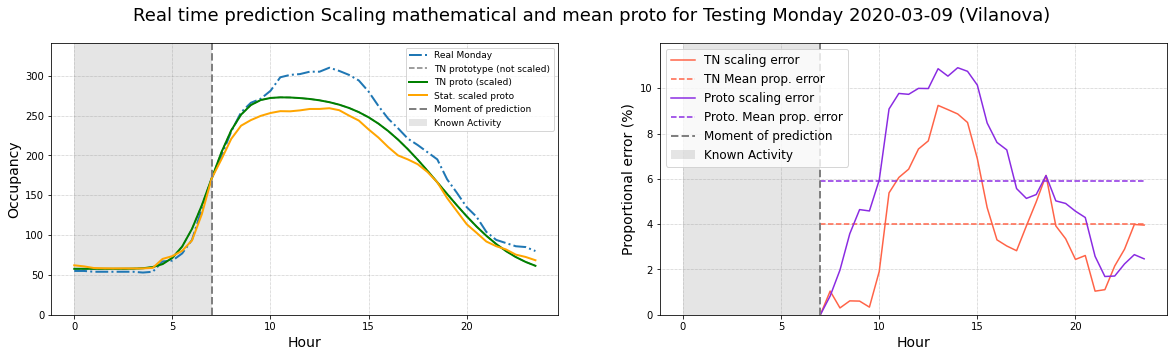

In [29]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_mondays
t_dates=testing_mondays_dates
limit_hour = 7
day = 'Monday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(5)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], 
                          scaled_tn_proto, scaled_stat_proto, limit_hour, t_date, current_parking)
    axx=1;
    errors_plottingM(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour, max_value)
    cont=cont+1

#### TUESDAY

2020-02-25
Real Tuesday scaled prtotype error:  3.27 %
Real Tuesday scaled prtotype STDV:  1.7119093112142398
Real Tuesday scaled TN error:  2.4 %
Real Tuesday scaled TN STDV:  1.8403040785216929
_____________________________________________________________
2020-03-03
Real Tuesday scaled prtotype error:  0.58 %
Real Tuesday scaled prtotype STDV:  0.36533417090479625
Real Tuesday scaled TN error:  1.16 %
Real Tuesday scaled TN STDV:  0.8528908280631152
_____________________________________________________________
2020-03-10
Real Tuesday scaled prtotype error:  1.77 %
Real Tuesday scaled prtotype STDV:  0.8397183235024889
Real Tuesday scaled TN error:  2.18 %
Real Tuesday scaled TN STDV:  1.576380416311705
_____________________________________________________________


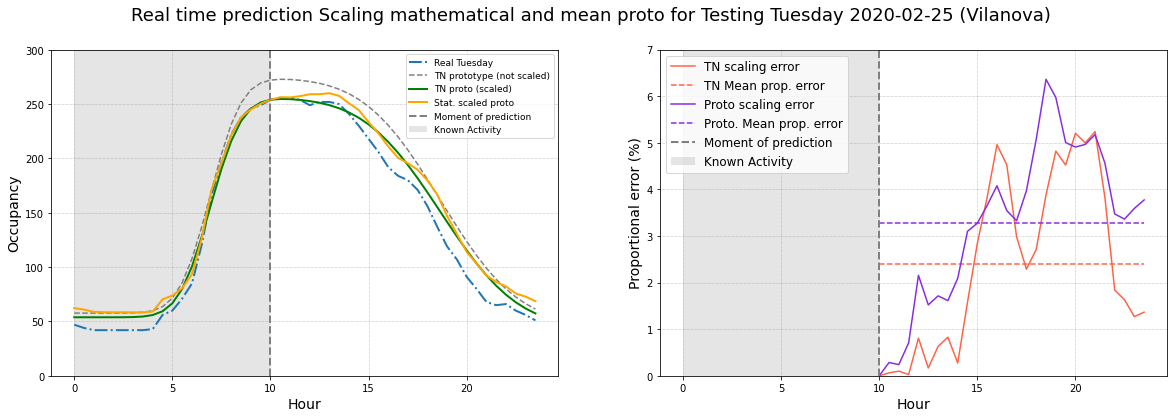

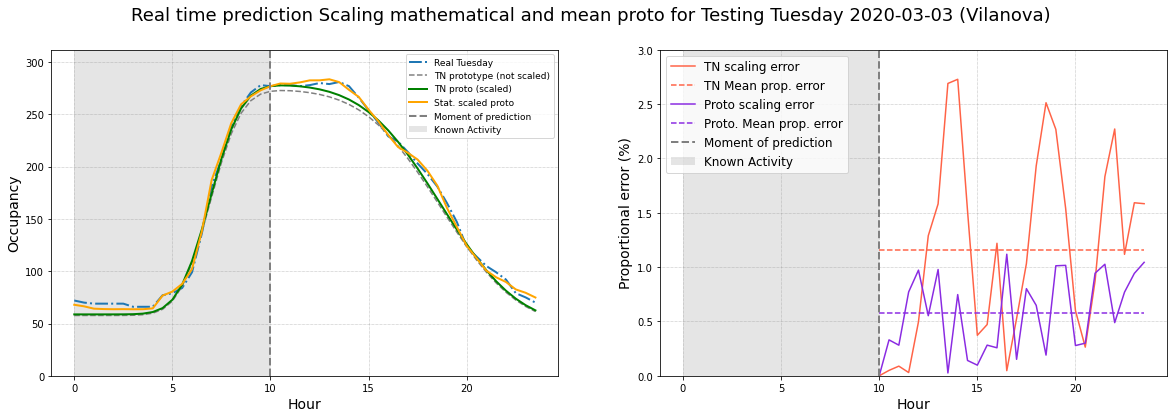

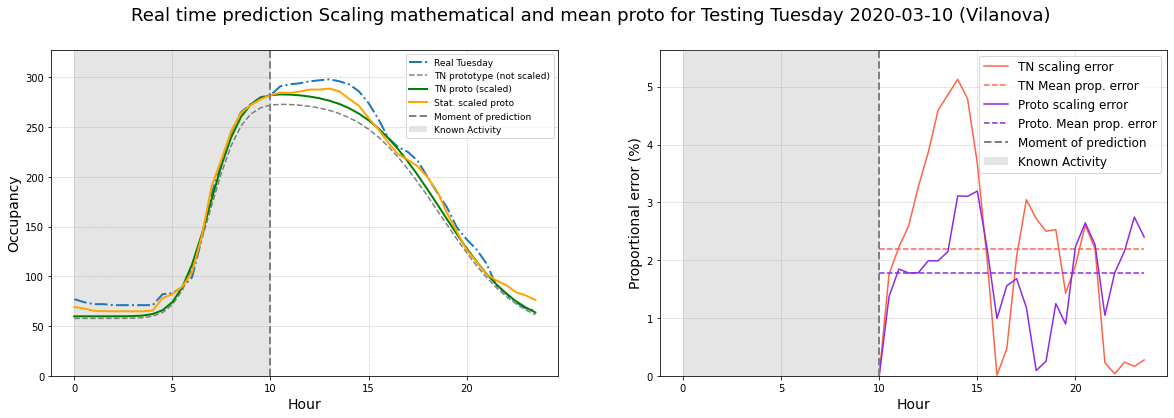

In [30]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_tuesdays
t_dates= testing_tuesdays_dates
limit_hour = 10
day = 'Tuesday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, 
                          scaled_stat_proto, limit_hour, t_date, current_parking)
    axx=1;
    errors_plottingM(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour, max_value)
    cont=cont+1

### WEDNESDAY

2020-02-26
Real Wednesday scaled prtotype error:  1.73 %
Real Wednesday scaled prtotype STDV:  1.6484589308565223
Real Wednesday scaled TN error:  1.91 %
Real Wednesday scaled TN STDV:  1.2390614900729284
_____________________________________________________________
2020-03-04
Real Wednesday scaled prtotype error:  0.6 %
Real Wednesday scaled prtotype STDV:  0.5869065947280577
Real Wednesday scaled TN error:  1.38 %
Real Wednesday scaled TN STDV:  1.238814198853126
_____________________________________________________________
2020-03-11
Real Wednesday scaled prtotype error:  1.71 %
Real Wednesday scaled prtotype STDV:  1.2553518174394143
Real Wednesday scaled TN error:  2.19 %
Real Wednesday scaled TN STDV:  1.641330148069307
_____________________________________________________________


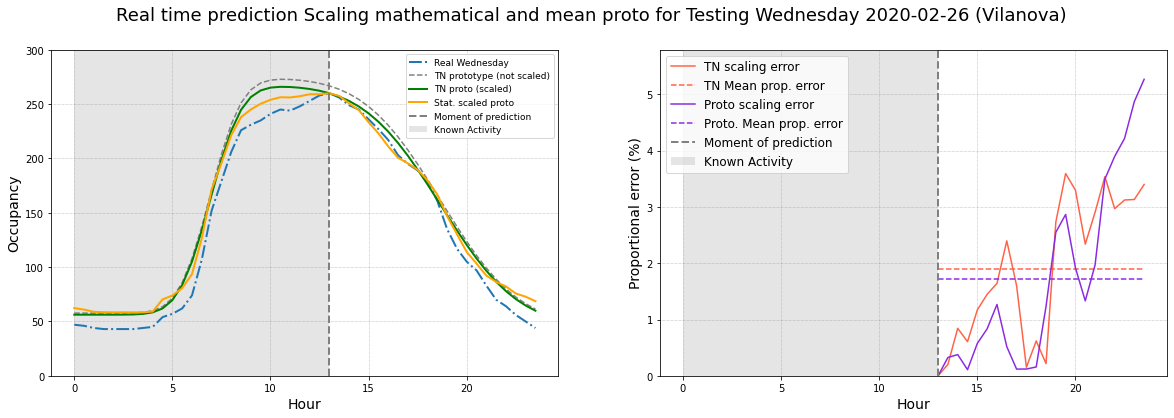

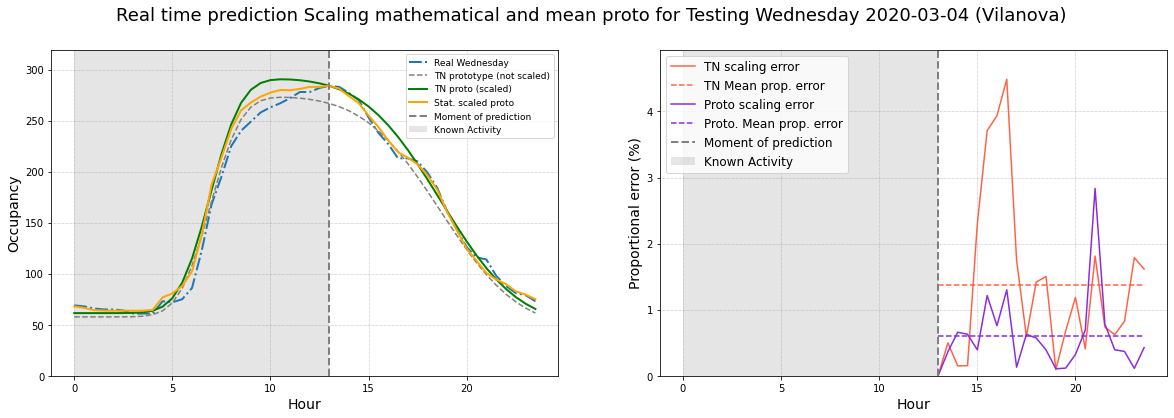

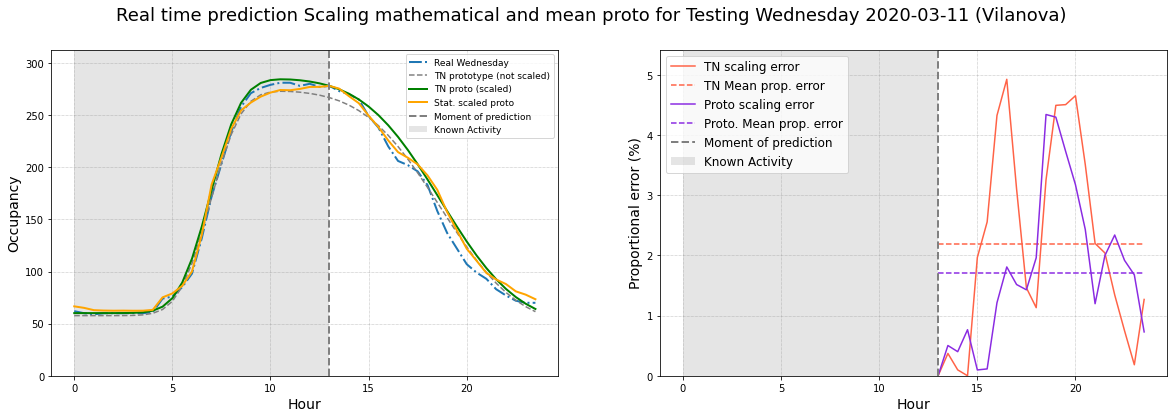

In [31]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_wednesdays
t_dates= testing_wednesdays_dates
limit_hour = 13
day = 'Wednesday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0

cont=0        
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, 
                          scaled_stat_proto, limit_hour, t_date, current_parking)
    axx=1;
    errors_plottingM(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour, max_value)
    cont=cont+1

### THURSDAY

2020-02-27
Real Thursday scaled prtotype error:  1.46 %
Real Thursday scaled prtotype STDV:  1.4354875566281173
Real Thursday scaled TN error:  1.52 %
Real Thursday scaled TN STDV:  0.9979313506824131
_____________________________________________________________
2020-03-05
Real Thursday scaled prtotype error:  1.46 %
Real Thursday scaled prtotype STDV:  0.8025999485798863
Real Thursday scaled TN error:  1.49 %
Real Thursday scaled TN STDV:  1.1035304936005685
_____________________________________________________________
2020-03-12
Real Thursday scaled prtotype error:  1.87 %
Real Thursday scaled prtotype STDV:  0.9794306663351574
Real Thursday scaled TN error:  1.93 %
Real Thursday scaled TN STDV:  1.2300373093612902
_____________________________________________________________


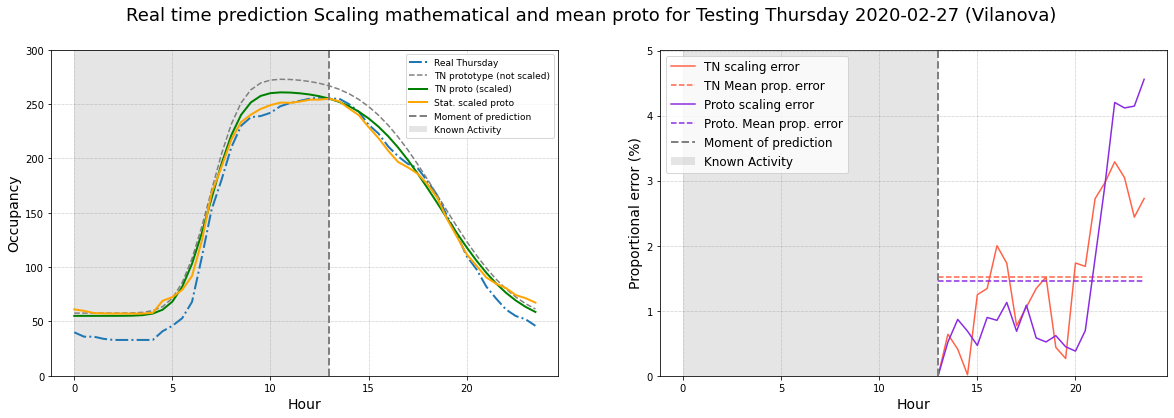

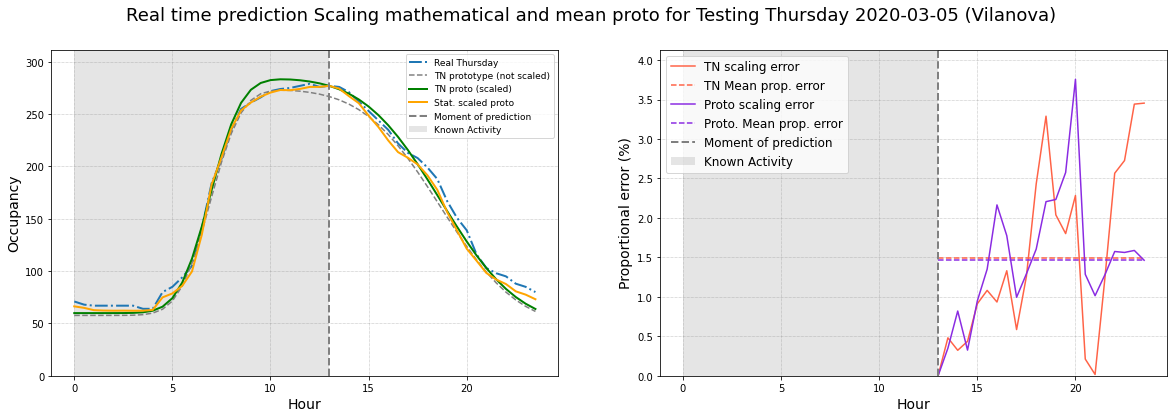

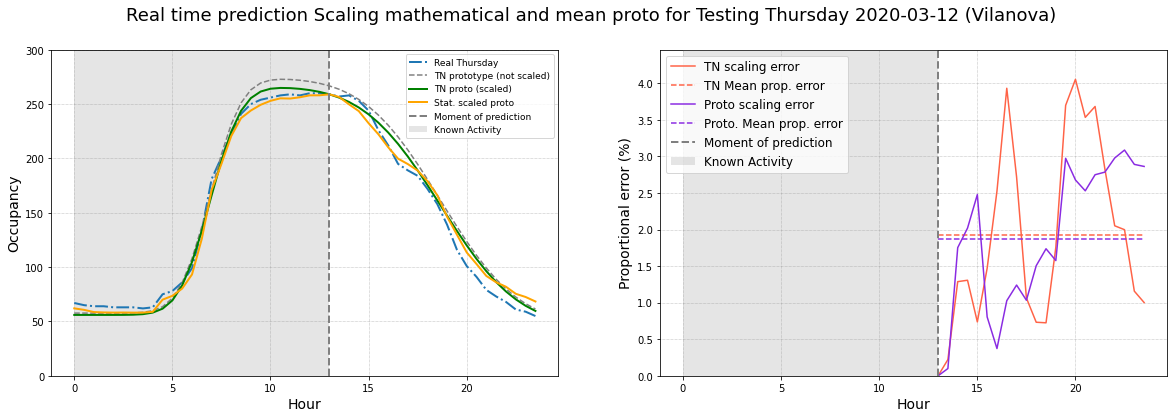

In [32]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_thursdays
t_dates= testing_thursdays_dates
limit_hour = 13
day = 'Thursday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
        
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, 
                          scaled_stat_proto, limit_hour, t_date, current_parking)
    axx=1;
    errors_plottingM(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour, max_value)
    cont=cont+1
    

### FRIDAY

2020-02-28
Real Friday scaled prtotype error:  0.93 %
Real Friday scaled prtotype STDV:  0.7435075609395435
Real Friday scaled TN error:  0.87 %
Real Friday scaled TN STDV:  0.7254117681130348
_____________________________________________________________
2020-03-06
Real Friday scaled prtotype error:  0.6 %
Real Friday scaled prtotype STDV:  0.5564908927146818
Real Friday scaled TN error:  1.82 %
Real Friday scaled TN STDV:  1.0965444372320252
_____________________________________________________________
2020-03-13
Real Friday scaled prtotype error:  0.64 %
Real Friday scaled prtotype STDV:  0.383226593712651
Real Friday scaled TN error:  0.81 %
Real Friday scaled TN STDV:  0.6904002587529038
_____________________________________________________________


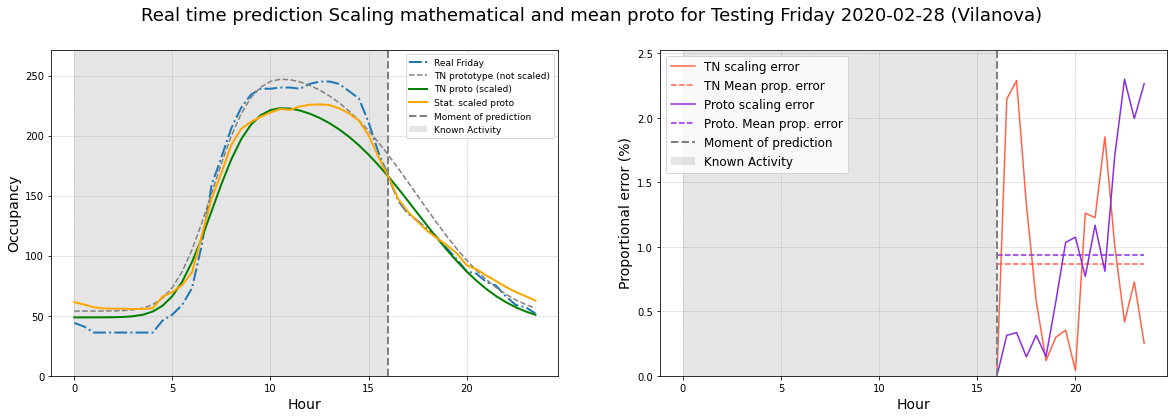

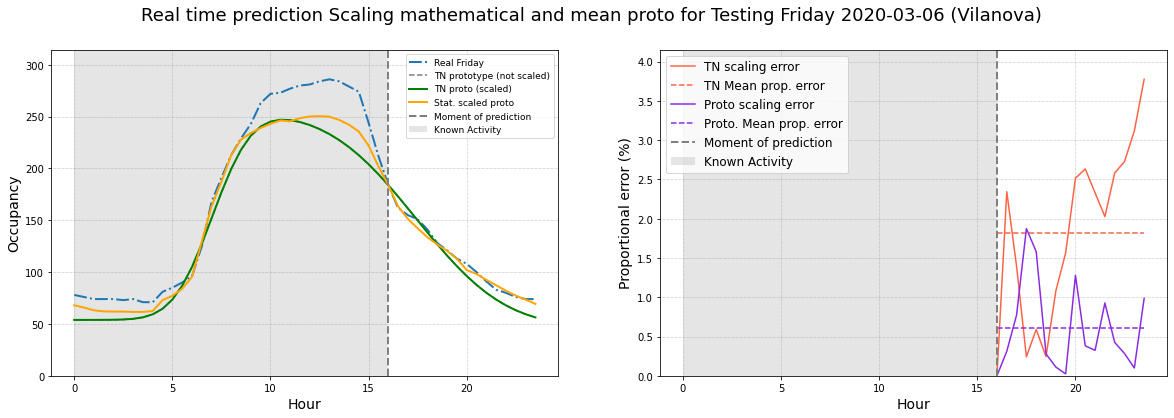

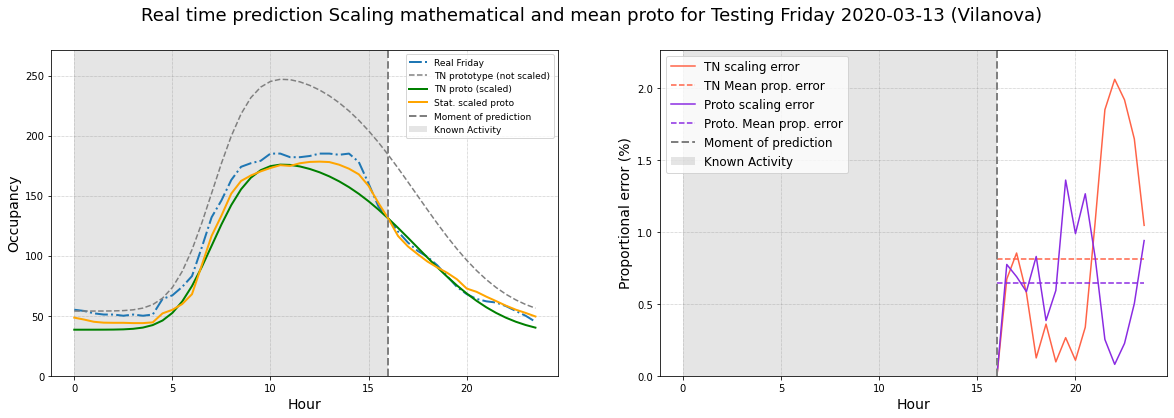

In [33]:
statistic_proto = hist_friday_proto
tn_proto = tn_friday
t_days = testing_fridays
t_dates=testing_fridays_dates
limit_hour = 16
day = 'Friday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
  
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], statistic_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = statistic_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, 
                          scaled_stat_proto, limit_hour, t_date, current_parking)
    axx=1;
    errors_plottingM(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour, max_value)
    cont=cont+1
    

### WEEKEND

### SATURDAY

2020-02-29
Real Saturday scaled prtotype error:  0.58 %
Real Saturday scaled prtotype STDV:  0.5095947898174878
Real Saturday scaled TN error:  0.76 %
Real Saturday scaled TN STDV:  0.4551976132455735
_____________________________________________________________
2020-03-07
Real Saturday scaled prtotype error:  0.7 %
Real Saturday scaled prtotype STDV:  0.5282220022959814
Real Saturday scaled TN error:  0.49 %
Real Saturday scaled TN STDV:  0.3656789290695027
_____________________________________________________________
2020-03-14
Real Saturday scaled prtotype error:  0.69 %
Real Saturday scaled prtotype STDV:  0.5417040752777806
Real Saturday scaled TN error:  0.35 %
Real Saturday scaled TN STDV:  0.2853203798231969
_____________________________________________________________


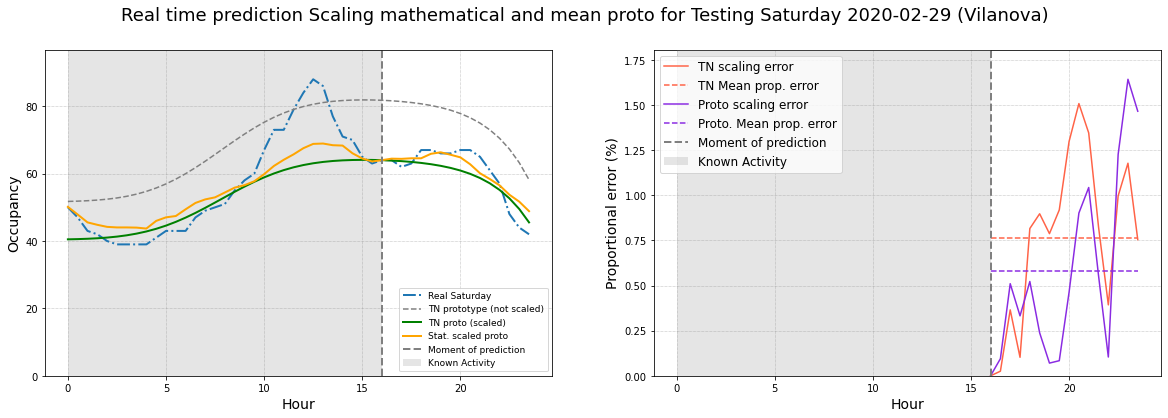

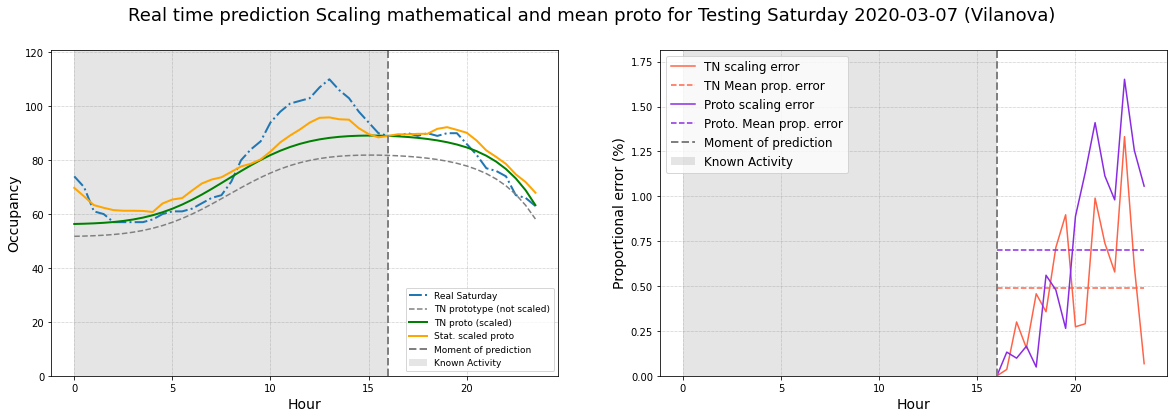

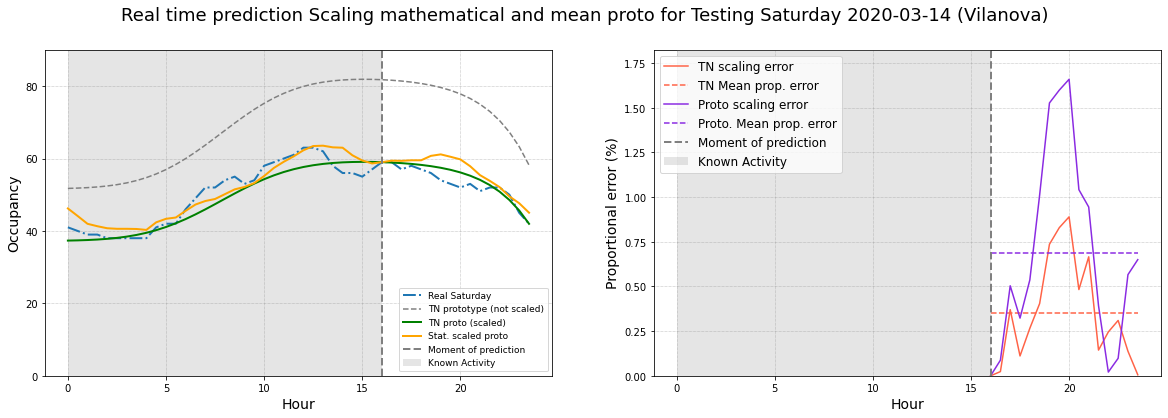

In [34]:
statistic_proto = hist_weekend_proto
tn_proto = tn1_weekend
t_days = testing_saturdays
t_dates= testing_saturdays_dates
limit_hour = 16
day = 'Saturday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
        
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], statistic_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = statistic_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, 
                          scaled_stat_proto, limit_hour, t_date, current_parking)
    #ax[0].set_ylim([0,axis_ylim_we])
    axx=1;
    errors_plottingM(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour, max_value)
    cont=cont+1

### SUNDAY

2020-03-01
Real Sunday scaled prtotype error:  0.66 %
Real Sunday scaled prtotype STDV:  0.4952028274707738
Real Sunday scaled TN error:  1.04 %
Real Sunday scaled TN STDV:  0.5778624973076442
_____________________________________________________________
2020-03-08
Real Sunday scaled prtotype error:  2.25 %
Real Sunday scaled prtotype STDV:  1.4372419016246958
Real Sunday scaled TN error:  2.98 %
Real Sunday scaled TN STDV:  1.568602552949824
_____________________________________________________________
2020-03-15
Real Sunday scaled prtotype error:  1.4 %
Real Sunday scaled prtotype STDV:  0.7262665168026039
Real Sunday scaled TN error:  0.96 %
Real Sunday scaled TN STDV:  0.7464907574086306
_____________________________________________________________


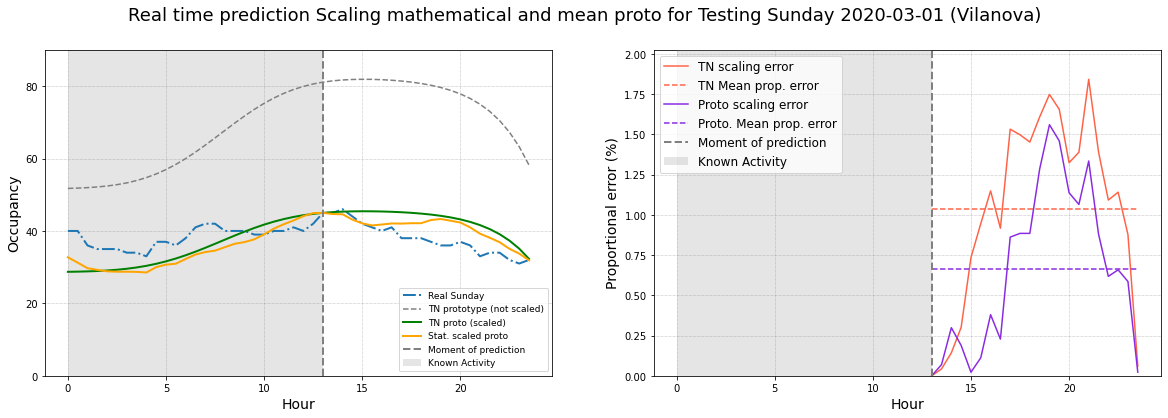

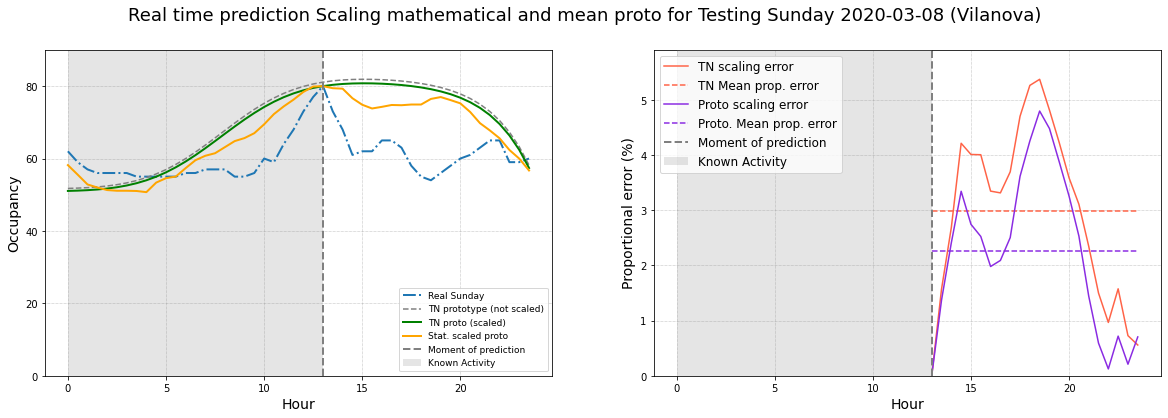

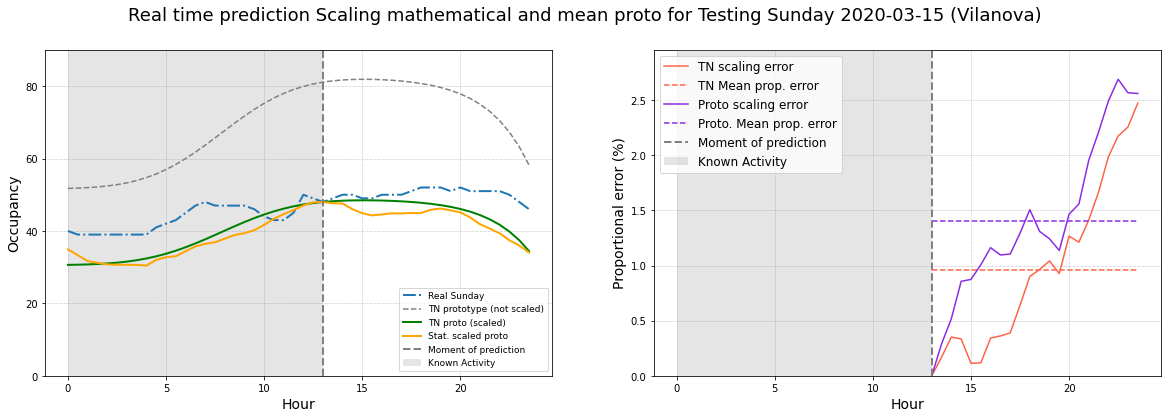

In [35]:
statistic_proto = hist_weekend_proto
tn_proto = tn1_weekend
t_days = testing_sundays
t_dates= testing_sundays_dates
limit_hour = 13
day = 'Sunday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
    
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], statistic_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = statistic_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, 
                          scaled_stat_proto, limit_hour, t_date, current_parking)
    #ax[0].set_ylim([0,axis_ylim_we])
    axx=1;
    errors_plottingM(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour, max_value)
    cont=cont+1

# Store protos, params, areas and offsets

In [36]:
# df_prototypes = pd.read_csv('data/prototypes_new.csv')
# index = 0

# weekday_tn_params = ','.join(str(e) for e in list(res_weekday.x))
# friday_tn_params  = ','.join(str(e) for e in list(res_friday.x))
# weekend_tn_params = ','.join(str(e) for e in list(res_weekend.x))

# weekday_mean_area = weekday_area
# friday_mean_area  = friday_area
# weekend_mean_area = weekend_area

# weekday_mean_offset = weekday_offset
# friday_mean_offset  = friday_offset
# weekend_mean_offset = weekend_offset

# total_wave_weekday_s = ','.join(str(e) for e in tn_weekday.tolist())
# total_wave_weekend_s = ','.join(str(e) for e in tn1_weekend.tolist())
# total_wave_friday_s  = ','.join(str(e) for e in tn_friday.tolist())

# historical_weekday_s = ','.join(str(e) for e in hist_weekday_proto.tolist())
# historical_weekend_s = ','.join(str(e) for e in hist_weekend_proto.tolist())
# historical_friday_s  = ','.join(str(e) for e in hist_friday_proto.tolist())


# df_prototypes.at[index,'CDF subtraction_weekday_proto'] = total_wave_weekday_s
# df_prototypes.at[index,'CDF subtraction_friday_proto']  = total_wave_friday_s
# df_prototypes.at[index,'CDF subtraction_weekend_proto'] = total_wave_weekend_s

# df_prototypes.at[index,'CDF subtraction_weekday_params'] = weekday_tn_params
# df_prototypes.at[index,'CDF subtraction_friday_params']  = friday_tn_params
# df_prototypes.at[index,'CDF subtraction_weekend_params'] = weekend_tn_params

# df_prototypes.at[index,'CDF subtraction_weekday_area'] = weekday_mean_area
# df_prototypes.at[index,'CDF subtraction_friday_area']  = friday_mean_area
# df_prototypes.at[index,'CDF subtraction_weekend_area'] = weekend_mean_area

# df_prototypes.at[index,'CDF subtraction_weekday_offset'] = weekday_mean_offset
# df_prototypes.at[index,'CDF subtraction_friday_offset']  = friday_mean_offset
# df_prototypes.at[index,'CDF subtraction_weekend_offset'] = weekend_mean_offset

# df_prototypes.at[index,'Historical_weekday_proto'] = historical_weekday_s
# df_prototypes.at[index,'Historical_weekend_proto'] = historical_weekend_s
# df_prototypes.at[index,'Historical_friday_proto']  = historical_friday_s

# df_prototypes.to_csv("data/final_prototypes.csv", index=False)
# df_prototypes

In [37]:
# How to read the prorotypes: 
# string = exportable_df.at[0,'CDF subtraction_weekday_proto']
# list_of_strings = string.split(',')
# final_list = list(np.float_(list_of_strings))

In [38]:
# import pandas as pd
# df_prototypes_2 = pd.read_csv('data/prototypes_new.csv')
# new_row = {'Location':'Cerdanyola'}
# #append row to the dataframe
# df_prototypes_2 = df_prototypes_2.append(new_row, ignore_index=True)
# df_prototypes_2

In [39]:
# df_prototypes_2.to_csv("data/prototypes_new.csv", index=False)
# day = 'Monday'
# date = '2020-02-24'
# real_day = mean_of_day(day,date)
# real_day.values

In [40]:
# hist_friday_proto.tolist()